<center>
  <h1>Tensor Computation with Applications</h1>
  <br />
  <h4>Second-year Master Modeling and Data Science</h4>
  <br />
  <h6>Student: IHIKKI Hamza</h6>
</center>


## Coding part

In [1]:
# import packages
import numpy as np
from numpy.linalg import norm
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy.sparse.linalg import svds
from scipy.linalg import pinv, khatri_rao

import random
import glob


### 1. Kronecker product

In [2]:
def kron(A, B):

    if A.ndim == 1:
        A = A[:,np.newaxis]
    if B.ndim == 1:
        B = B[:,np.newaxis]
        
    m, n = A.shape
    p, q = B.shape
    C = np.zeros((m*p, n*q))
    for i in range(m):
        for j in range(n):
            C[i*p:(i+1)*p, j*q:(j+1)*q] = A[i,j] * B
    return C

In [3]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[6, 7, 8], [9, 10, 10]])
C = kron(A, B)
print(C)

[[ 6.  7.  8. 12. 14. 16. 18. 21. 24.]
 [ 9. 10. 10. 18. 20. 20. 27. 30. 30.]
 [24. 28. 32. 30. 35. 40. 36. 42. 48.]
 [36. 40. 40. 45. 50. 50. 54. 60. 60.]]


### 2. Hadamard product

In [4]:
def hadamard(A, B):
    
    # Prendre en consideration 1D-Array
    if A.ndim == 1:
        A = A[:,np.newaxis]
    if B.ndim == 1:
        B = B[:,np.newaxis]
        
    n, m = A.shape
    p, q = B.shape

    # Verification de la taille de ces deux matrices
    if (n, m) != (p, q):
        raise ValueError("The matrices must be of the same size.")
    
    C = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            C[i,j] = A[i,j] * B[i,j]
    return C

In [5]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[6, 7, 8], [9, 10, 10]])
C = hadamard(A, B)
print(C)

[[ 6. 14. 24.]
 [36. 50. 60.]]


### 3. Diamand product

In [6]:
def diamond(A, B):

    if A.ndim == 1:
        A = A[:,np.newaxis]
    if B.ndim == 1:
        B = B[:,np.newaxis]

    n, m = A.shape
    p, q = B.shape
    C = np.zeros((n, q))
    for i in range(n):
        for j in range(q):
            C[i,j] = np.sum(A[i,:] * B[:,j])
    return C

In [7]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[10, 11, 12], [13, 14, 15], [16, 17, 18]])
C = diamond(A, B)
print(C)

[[ 84.  90.  96.]
 [201. 216. 231.]
 [318. 342. 366.]]


### 4. Khatri-rao and face-splitting

In [8]:
def khatri_rao(A, B):

    if A.ndim == 1:
        A = A[:,np.newaxis]
    if B.ndim == 1:
        B = B[:,np.newaxis]

    n, m = A.shape
    p, q = B.shape
    if m != q:
        raise ValueError("The matrices must be of the same size.")
    C = np.zeros((n*p, q))

    for i in range(m):
      C[:,i] = kron(A[:,i], B[:, i]).flatten()
    
    return C



In [9]:
A = np.array([[3, 2], [1, 7]])
B = np.array([[3, 6], [7, 2]])
C_kr = khatri_rao(A, B)
print(C_kr)

[[ 9. 12.]
 [21.  4.]
 [ 3. 42.]
 [ 7. 14.]]


In [10]:
def face_splitting(A, B):
    if A.ndim == 1:
        A = A[:,np.newaxis]
    if B.ndim == 1:
        B = B[:,np.newaxis]

    n, m = A.shape
    p, q = B.shape
    if n != p:
        raise ValueError("The matrices must be of the same size.")
    
    C = np.zeros((n, m*q))
    for i in range(n):
        C[i, :] = kron(A[i, :], B[i, :]).flatten()
    return C


In [11]:
A = np.array([[10, 2], [7, 46]])
B = np.array([[3, 5], [1, 2]])
C_fs = face_splitting(A, B)
print(C_fs)

[[30. 50.  6. 10.]
 [ 7. 14. 46. 92.]]


### 5.Image compression using SVD

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Elon_Musk.jpeg to Elon_Musk.jpeg


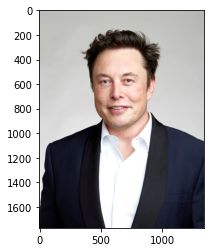

In [13]:
img = plt.imread('Elon_Musk.jpeg')
plt.imshow(img)
plt.show()

In [14]:
img.shape

(1771, 1337, 3)

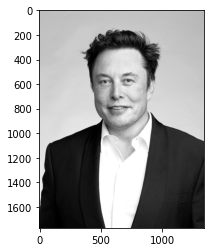

In [15]:
gray = rgb2gray(img)
plt.imshow(gray, cmap='gray')
plt.show()

u.shape:(1771, 1337),s.shape:(1337,),v.shape:(1337, 1337)
Nombre de valeurs propres :  1337
variance de top 10 valeurs singulières:
[0.816719 0.125057 0.014724 0.01159  0.00657  0.003148 0.002586 0.002117
 0.001697 0.001462]


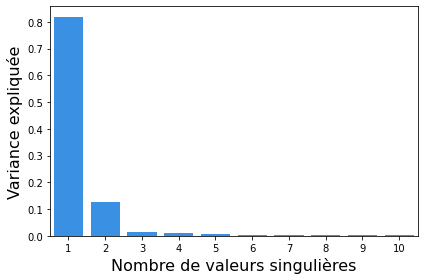

In [16]:
u, s, v = np.linalg.svd(gray, full_matrices=False) #SVD decomposition

print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')

var_explained = np.round(s**2/np.sum(s**2), decimals=6)

print("Nombre de valeurs propres : ", len(var_explained))

print(f'variance de top 10 valeurs singulières:\n{var_explained[0:10]}')
 
sns.barplot(x=list(range(1, 11)),
            y=var_explained[0:10], color="dodgerblue")
 
plt.xlabel('Nombre de valeurs singulières', fontsize=16)
plt.ylabel('Variance expliquée', fontsize=16)
plt.tight_layout()
plt.show()

###### plot images with different numbers of singular values

Pour k = 1, l'erreur de compression = 0.42811341236860867
Pour k = 5, l'erreur de compression = 0.15918547697824534
Pour k = 10, l'erreur de compression = 0.11970708740488978
Pour k = 20, l'erreur de compression = 0.08954758855263123
Pour k = 50, l'erreur de compression = 0.06442818943869089


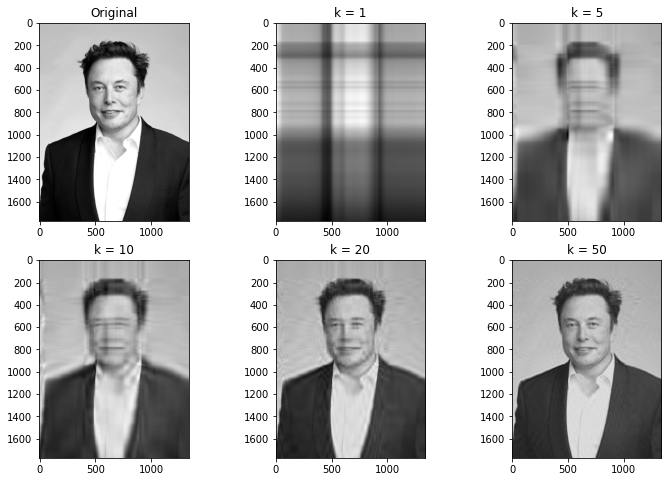

In [17]:
comps = ["all", 1, 5, 10, 20, 50]
plt.figure(figsize=(12, 8))
 
for i in range(len(comps)):   
    if(i == 0):
        plt.subplot(2, 3, i+1),
        plt.imshow(gray, cmap='gray'),
        plt.title(f'Original')
     
    else:
        img_reduction = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]

        relative_error = norm(gray - img_reduction) / norm(gray)

        print("Pour k = {}, l'erreur de compression = {}".format(comps[i], relative_error))
        plt.subplot(2, 3, i+1),
        plt.imshow(img_reduction, cmap='gray'),
        plt.title(f'k = {comps[i]}')

### 6. Image classification

In [18]:
class ImageClassificationSVD():

  def __init__(self, path):
    self.X_mean = []
    self.X = []
    self.path = path

    for img in glob.glob(path):
      
      gray = rgb2gray(plt.imread(img))
      n_vect = np.reshape(gray, [gray.shape[0] * gray.shape[1], ])
      n_vect_mean = n_vect.mean()

      self.X += [n_vect]
      self.X_mean += [n_vect - n_vect_mean] 
      
    self.X = np.array(self.X).T
    self.X_mean = np.array(self.X_mean).T

  
  def fit(self, threshold):
    self.threshold = threshold

    u, s, v = svds(self.X_mean)

    var_explained = np.round(s**2/np.sum(s**2), decimals=6)

    self.n_comp = np.argmax(np.cumsum(var_explained) > threshold) + 1
   
    sns.barplot(x=list(range(1, self.n_comp + 1)),
                y=var_explained[0:self.n_comp][::-1], color="dodgerblue")
    
    plt.xlabel('Nombre de valeurs singulières', fontsize=16)
    plt.ylabel('Variance expliquée', fontsize=16)
    plt.tight_layout()
    plt.show()

    self.U_k, S_k, V_T_k = svds(self.X_mean, k=self.n_comp)
    self.X_projection = self.U_k.T.dot(self.X_mean)


  def predict(self, X0):
    
    X0_vect = np.reshape(X0, [X0.shape[0] * X0.shape[1], ])
    X0_mean = np.array(X0_vect - X0_vect.mean()).T

    """
      Finding the image which minimize the norm of the projection of X0 in new space
      In others words, the closest image of X0
    """
    img_index = np.argmin(np.linalg.norm((self.X_projection.T - (self.U_k.T.dot(X0_mean)).T), axis=1))
    
    img_path = glob.glob(self.path)[img_index]
    img = rgb2gray(plt.imread(img_path))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(X0, cmap="gray")  
    plt.title('Image Originale')

    plt.subplot(1, 2, 2)
    plt.imshow(img, cmap="gray")

    plt.title('Image reconnue en utilisant la decomposition SVD')
    plt.show()

#### Testing the model

In [19]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/My Drive/TensorFolder/'

Mounted at /content/drive
/content/drive/My Drive/TensorFolder


In [20]:
!ls yalle_train

yaleB01_P00A+000E+00.pgm  yaleB02_P00A+015E+20.pgm  yaleB03_P00A+060E-20.pgm
yaleB01_P00A+000E-20.pgm  yaleB02_P00A+020E-10.pgm  yaleB03_P00A+070E+00.pgm
yaleB01_P00A+000E-35.pgm  yaleB02_P00A+020E+10.pgm  yaleB03_P00A+070E-35.pgm
yaleB01_P00A+000E+45.pgm  yaleB02_P00A+035E+15.pgm  yaleB03_P00A+070E+45.pgm
yaleB01_P00A+000E+90.pgm  yaleB02_P00A+035E-20.pgm  yaleB03_P00A+085E-20.pgm
yaleB01_P00A+005E-10.pgm  yaleB02_P00A+035E+40.pgm  yaleB03_P00A+095E+00.pgm
yaleB01_P00A+005E+10.pgm  yaleB02_P00A+035E+65.pgm  yaleB03_P00A+110E+15.pgm
yaleB01_P00A+010E+00.pgm  yaleB02_P00A+050E+00.pgm  yaleB04_P00A+000E+00.pgm
yaleB01_P00A+010E-20.pgm  yaleB02_P00A+060E-20.pgm  yaleB04_P00A+000E-20.pgm
yaleB01_P00A+020E-10.pgm  yaleB02_P00A+070E+00.pgm  yaleB04_P00A+000E+20.pgm
yaleB01_P00A+020E+10.pgm  yaleB02_P00A+070E-35.pgm  yaleB04_P00A+000E-35.pgm
yaleB01_P00A+020E-40.pgm  yaleB02_P00A+070E+45.pgm  yaleB04_P00A+000E+45.pgm
yaleB01_P00A+035E+15.pgm  yaleB02_P00A+085E-20.pgm  yaleB04_P00A+000E+90.pgm

<ipython-input-18-6a9a41429b26>:10: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray = rgb2gray(plt.imread(img))


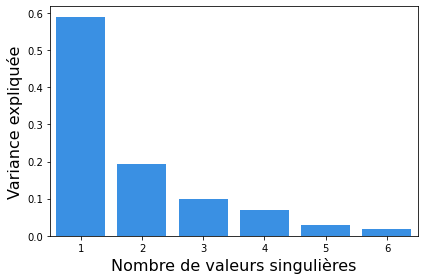

In [21]:
svdModel = ImageClassificationSVD("yalle_train/*.pgm")

threshold = 0.80 
svdModel.fit(threshold)

Pour conserver 80% de l'image, on doit utiliser 6 valeurs singulières. Testons alors notre modèle sur les images de la base de données **yalle**.

<ipython-input-28-5d72a7d8112b>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  X0 = rgb2gray(plt.imread(X0_path))
<ipython-input-18-6a9a41429b26>:54: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(plt.imread(img_path))


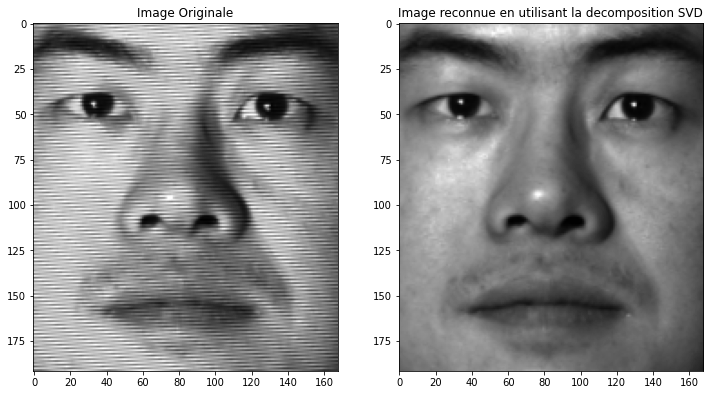

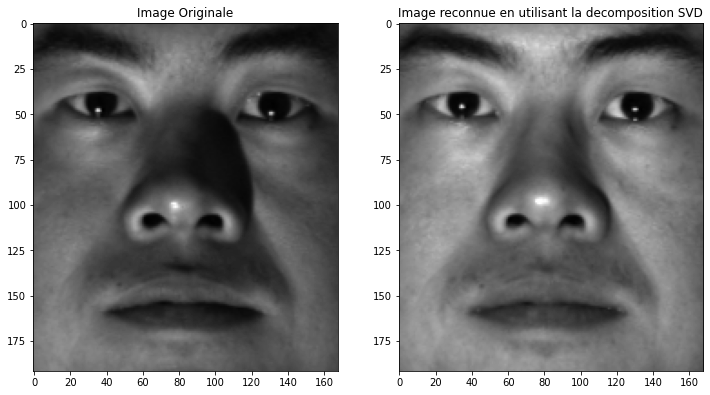

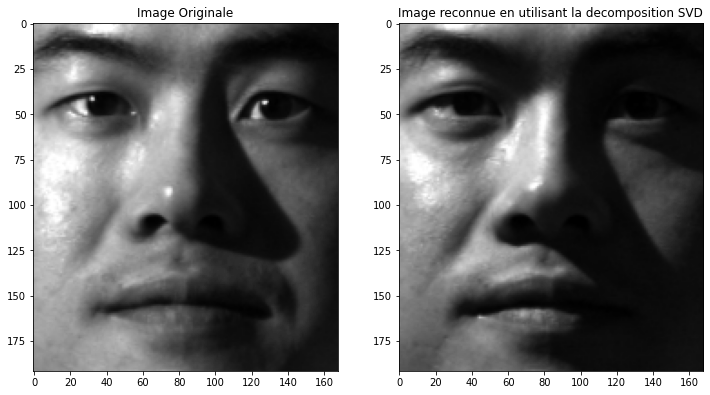

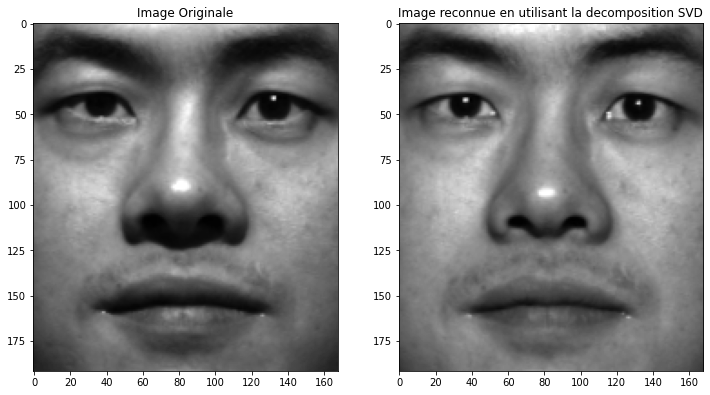

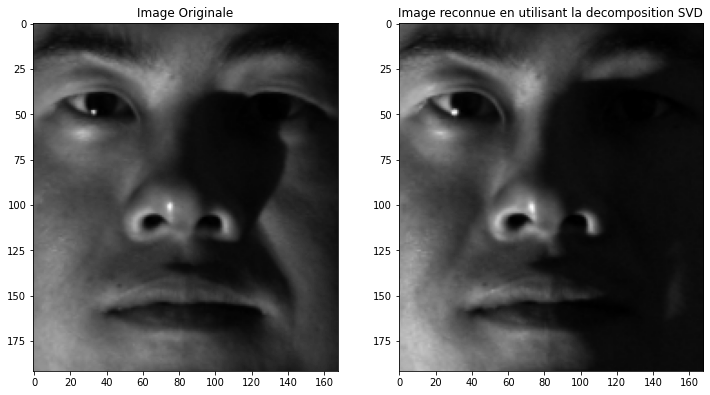

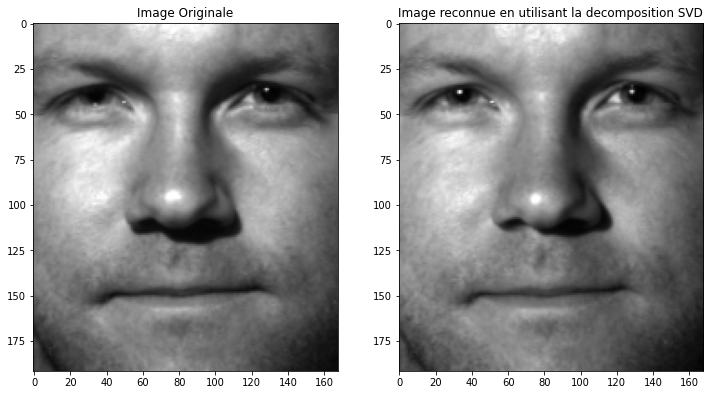

In [28]:
for i in range(0, 6):
  X0_path = glob.glob("yalle_prob/*.pgm")[i]
  X0 = rgb2gray(plt.imread(X0_path))
  svdModel.predict(X0)
  print("\n")

#### Conclusion
* SVD model is able to identify and classify a person among different people because of SVD decomposition 


### 7. Matrix completion

In [29]:
def removePixel(image, percent=0.5): #add a pourcentage of noise in the given image

  noisy_img = image.copy()

  # Pixel to remove
  num_pixels = int(percent * image.shape[0] * image.shape[0])

  # Generate random index for removing pixels
  indices = np.random.choice(image.size, num_pixels, replace=False)

  # Remplaçons les pixels sélectionnés par des pixels noirs ou transparents (par des zéros) Replace chosen pixels with I=0
  noisy_img[np.unravel_index(indices, image.shape)] = 0

  return noisy_img


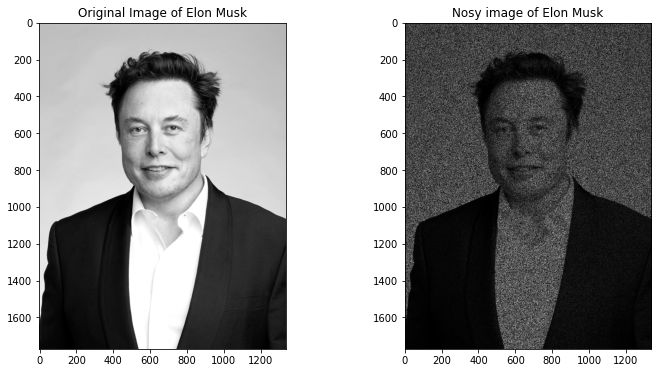

In [30]:
noise = removePixel(gray, percent=0.5)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(gray, cmap="gray")
axes[0].set_title("Original Image of Elon Musk")

axes[1].imshow(noise, cmap="gray")
axes[1].set_title("Nosy image of Elon Musk")
plt.show()

**Completion Matrix**.

In [31]:
def P_omega(X, omega): 

    P_omega = np.zeros_like(X)
    
    P_omega[omega] = X[omega]
    
    return P_omega

def D_tau(X, tau):
    U, S, V = np.linalg.svd(X, full_matrices=False)

    D_tau = U @ np.diag(np.maximum(S - tau, 0)) @ V
    
    return D_tau

In [33]:
def admm(M, beta, tol, max_iter):
    omega = np.where(M!=0)

    omega_c =  np.where(M==0)

    X = np.zeros_like(M)
    Z = np.zeros_like(M)
    Q = np.zeros_like(M)

    errors = []
    RSE = []
    PSNR = []
    iterations = []

    for i in range(max_iter):
      X_prev = X.copy()
     
      """
      We know that P(M) = M. with M is the matrix to complete
      """
      # Updating X using projection
      X = P_omega(Z - Q / beta, omega_c) + M

      # Updating Z using D_tau
      Z = D_tau(X + Q / beta, 1./beta)

    
      # Updating Q using X and Z
      Q = Q + beta * (X - Z)
      
      # Error between original image (gray) and the completed one
      error = norm(gray - X, 'fro')
      errors += [error]

      rse = norm(gray - X, 'fro')**2 / norm(gray, 'fro')**2
      RSE += [rse]

      psnr = 10 * np.log10((np.max(X))**2 / norm(gray - X, 'fro')**2)
      PSNR += [psnr]

      iterations += [i+1]

      if norm(X - X_prev, 'fro') <= tol:
        break
    

    fig, axes = plt.subplots(1, 3, figsize=(12, 6))
    axes[0].imshow(gray, cmap="gray")
    axes[0].set_title("Original image")

    axes[1].imshow(M, cmap="gray")
    axes[1].set_title("Nosy image")

    axes[2].imshow(X, cmap="gray")
    axes[2].set_title("Reconstructed Image")
    plt.show()

    print("\n")
    # Plot "Errors"
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))
    axes[0].plot(iterations, errors)
    axes[0].set_xlabel("iteration")
    axes[0].set_ylabel("error")

    axes[1].plot(iterations, RSE)
    axes[1].set_xlabel("iteration")
    axes[1].set_ylabel("RSE")

    axes[2].plot(iterations, PSNR)
    axes[2].set_xlabel("iteration")
    axes[2].set_ylabel("PSNR")
    plt.show()

    return X

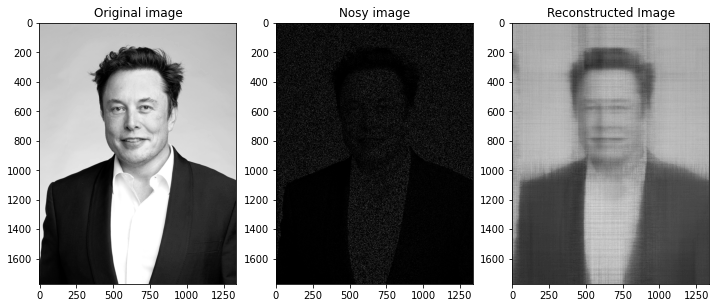

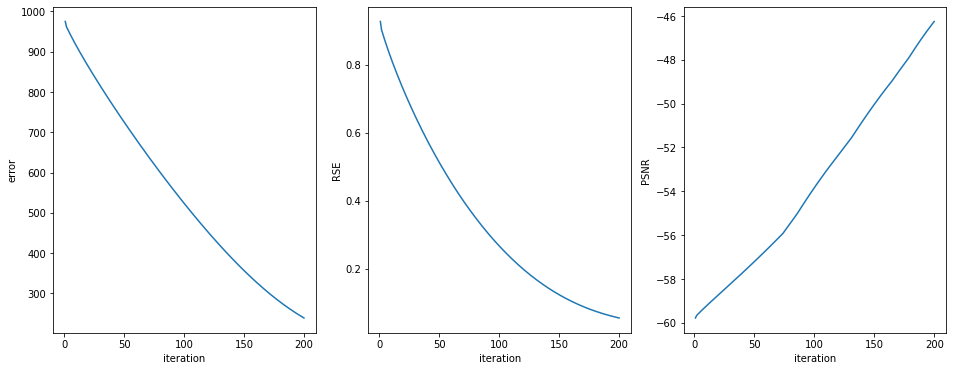

In [34]:
# Initialisation 
noise = removePixel(gray, percent=0.70) 

beta = 1.0
tol = 10^(-4)
max_iter = 200

img_completed = admm(noise, beta, tol, max_iter)

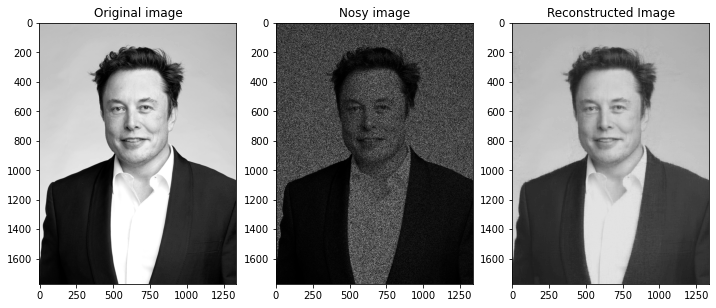

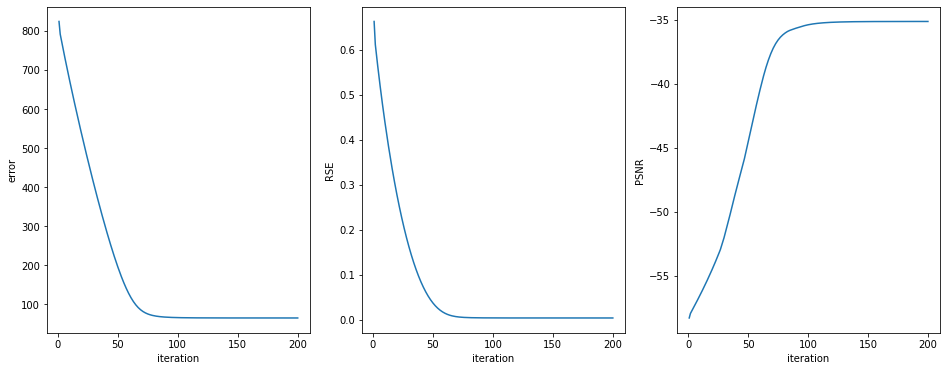

In [35]:
# Initialization 
noise = removePixel(gray, percent=0.50)

beta = 1.0
tol = 10^(-4)
max_iter = 200

img_completed = admm(noise, beta, tol, max_iter)

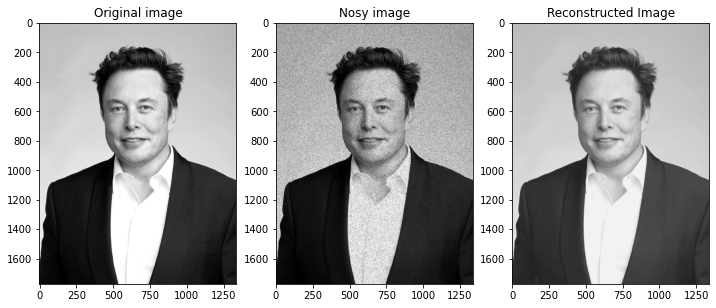

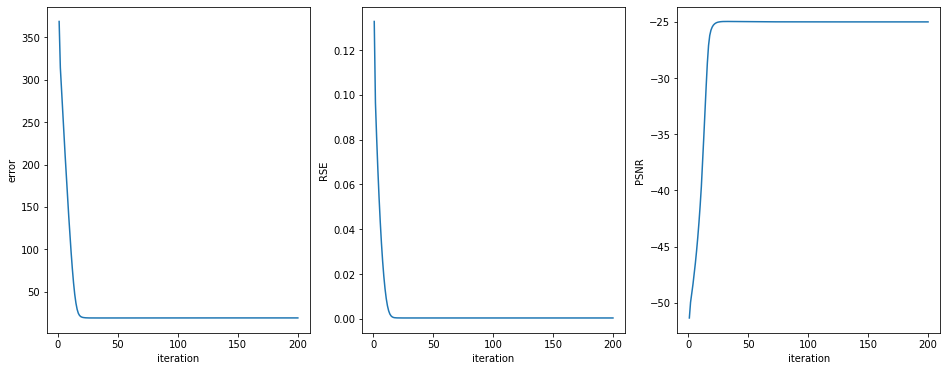

In [37]:
noise = removePixel(gray, percent=0.10)

beta = 1.0
tol = 10^(-4)
max_iter = 200

img_completed = admm(noise, beta, tol, max_iter)

### 8. Matrix RPCA

In [38]:
def addNoise(image, percent):

      s_vs_p = 0.5
      out = np.copy(image)
      
      # add salt to the image 
      num_salt = np.ceil(percent * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[tuple(coords)] = 1.

      # add pepper to the image
      num_pepper = np.ceil(percent* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
      out[tuple(coords)] = 0.
      return out

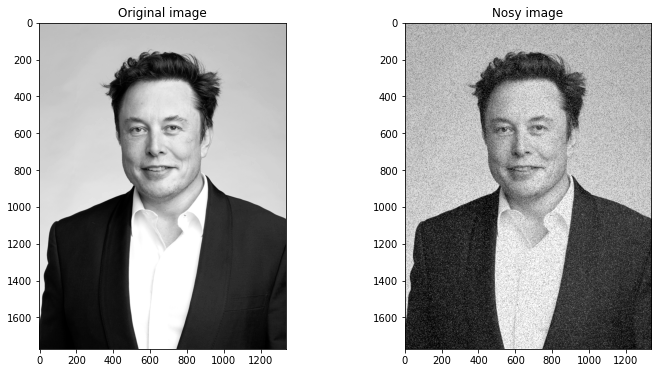

In [39]:
noise = addNoise(gray, percent=0.20)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(gray, cmap="gray")
axes[0].set_title("Original image")

axes[1].imshow(noise, cmap="gray")
axes[1].set_title("Nosy image")
plt.show()

In [40]:
def proxl1(A, lambda_):
    B = np.maximum(np.abs(A) - lambda_, 0) * np.sign(A)
    B = np.where(B == -0., 0, B)
    return B


In [41]:
def rpca(X, tol, max_iter):
    
    n1, n2 = X.shape
    # optimal beta 
    beta = n1 * n2/(4 * np.sum(np.abs(X.reshape(-1))))

    # optimal lambda 
    lambda_ = 1./np.sqrt(np.maximum(n1, n2))
        
    L = np.zeros_like(X)
    S = np.zeros_like(X)
    Q = np.zeros_like(X)

    for i in range(max_iter):
      L_prev = L.copy()
      S_prev = S.copy()

      # upadating L using D_tau
      L = D_tau(X - S_prev + (Q / beta), 1./beta)

      # updating S using projection
      S = proxl1(X - L + (Q / beta), lambda_/beta)

      # updating Q using X and Z
      Q = Q + beta * (X - L - S)

      # Errors between original image (gray) and the completed one
      err1 = norm(X - L - S, np.inf)
      err2 = norm(L - L_prev, np.inf)
      err3 = norm(S - S_prev, np.inf)

      if (err1 <= tol) and (err2 <= tol) and (err3 <= tol):
        break
    

    fig, axes = plt.subplots(1, 3, figsize=(12, 6))
    axes[0].imshow(gray, cmap="gray")
    axes[0].set_title("Original image")

    axes[1].imshow(X, cmap="gray")
    axes[1].set_title("Nosy image")

    axes[2].imshow(L, cmap="gray")
    axes[2].set_title("Reconstructed image")
    plt.show()

    return L, S

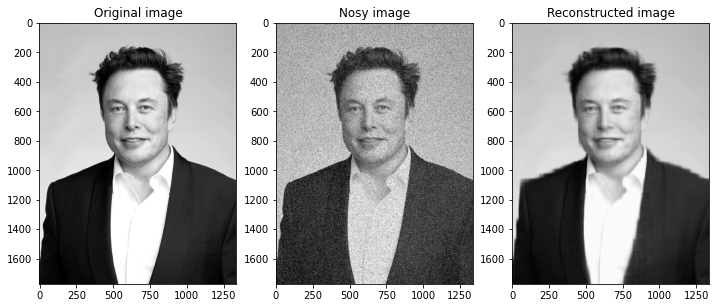

In [42]:
noise = addNoise(gray, percent=0.35)

tol = 10^(-4)
max_iter = 200

L, S = rpca(noise, tol, max_iter)

### 9. Fonction fold et unfold (n-mode matricization)

In [43]:
def unfold(A, dim, n):

  new_tensor = np.moveaxis(A, n, 0)
  
  unfolded_tensor = np.reshape(new_tensor, (dim[n], -1))

  return unfolded_tensor

In [44]:
def fold(A, dim, n):
  
  # Calculate the size of the original tensor
  tensor_size = tuple(dim[i] if i != n else -1 for i in range(len(dim)))

  # Reshape the matrix as the original shape of the tensor
  folded_tensor = np.reshape(A, tensor_size)

  # Return the mode axis to its original position
  new_tensor = np.moveaxis(folded_tensor, 0, n)

  return new_tensor


In [45]:
A = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

dim = A.shape
n = 1

matrix = unfold(A, dim, n)
print(matrix)

[[1 2 5 6]
 [3 4 7 8]]


In [46]:
matrix_folded = fold(matrix, dim, n)
print(matrix_folded)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [47]:
# Verification of the  fold(unfold(A)) = A.
assert np.array_equal(A, matrix_folded)

### 10. n-mode product

In [48]:
def n_mode_product(A, B, n):
  dimA = A.shape
  dimB = B.shape

  matrix_A = unfold(A, dimA, n)

  # Multiplication of unfolded matrices
  matrix_c = np.matmul(B, matrix_A)
  
  # Folding of the result matrix into a tensor C of the same shape as A and B
  new_dim = list(dimA)
  new_dim[n] = dimB[1]
  new_dim = tuple(new_dim)

  C = fold(matrix_c, new_dim, n)

  return C


In [49]:
# Create two tensor 3D with the shape (2, 3, 4)
A = np.arange(24).reshape((3, 4, 2))
print(A)

B = np.arange(1, 5).reshape((2, 2))
print(B)
print("\n")

# Calculation of the n-mode multiplication of A and B according to mode 2
C = n_mode_product(A, B, 2)
print(C)

[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]
  [12 13]
  [14 15]]

 [[16 17]
  [18 19]
  [20 21]
  [22 23]]]
[[1 2]
 [3 4]]


[[[  2  50  60]
  [  8  56  74]]

 [[ 14  62  88]
  [ 20  68 102]]

 [[ 26   4 116]
  [ 32  18 130]]

 [[ 38  32 144]
  [ 44  46 158]]]


In [50]:
A = np.arange(24).reshape((2, 3, 4))
print(A)

B = np.arange(1, 7).reshape((2, 3))
print(B)
print("\n")

# Calculation of the n-mode multiplication of A and B according to mode 1
C = n_mode_product(A, B, 1)
print(C)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[[1 2 3]
 [4 5 6]]


[[[ 32  38  44  50]
  [ 68  83  98 113]]

 [[104 110 116 122]
  [248 263 278 293]]]


### 11. ALS-CP decomposition of a third-order tensor

- the khatri_rao function of scipy is more optimized according to some tests we have done.

In [51]:
from scipy.linalg import pinv, khatri_rao

def als_cp_third(X ,R):

    dim = X.shape
    # Initialization: A, B, C
    A_tilde = np.random.rand(dim[0], R)
    B = np.random.rand(dim[1], R)
    C = np.random.rand(dim[2], R)
    
    A = A_tilde.copy()
    lambda_ = np.zeros(R)
    
    tol = 1e-4
    max_iter = 5000

    X_0 = unfold(X, dim, 0)
    X_1 = unfold(X, dim, 1)
    X_2 = unfold(X, dim, 2)

    for i in range(max_iter):

        # Update A
        p_inv = pinv(khatri_rao(C, B).T)
        A_tilde = X_0 @ p_inv
        
        # Update B
        p_inv = pinv(khatri_rao(C, A_tilde).T)
        B = X_1 @ p_inv

        # Update C
        p_inv = pinv(khatri_rao(B, A_tilde).T)
        C = X_2 @ p_inv
        
        for r in range(R):
          lambda_[r] = norm(A_tilde[:, r])
          if lambda_[r] != 0:
            A[:, r] = A_tilde[:, r]/lambda_[r]
        
        # Check convergence
        X_reconstructed = np.einsum('ir, jr, kr -> ijk', A @ np.diag(lambda_), B, C)
        error = norm(X - X_reconstructed)
        if error <= tol:
            break
        
    return  lambda_, A, B, C

In [52]:
X = np.random.rand(2, 3, 2)

# Decomposition ALS-CP
lambda_, A, B, C = als_cp_third(X, 3)

print(A)
print(B)
print(C)

[[-0.56309489  0.56309489  0.73784038]
 [-0.82639225  0.82639225  0.67497524]]
[[0.00000000e+00 1.46366760e-47 0.00000000e+00]
 [0.00000000e+00 2.44338398e-47 0.00000000e+00]
 [0.00000000e+00 2.98008191e-47 0.00000000e+00]]
[[0.00000000e+000 1.33154928e+164 0.00000000e+000]
 [0.00000000e+000 1.03442681e+164 0.00000000e+000]]


In [53]:
print(X)
X_reconstructed = np.einsum('ir, jr, kr -> ijk', A @ np.diag(lambda_), B, C)
print("================================================")
print(X_reconstructed)

[[[0.01979395 0.24921711]
  [0.88047449 0.17782457]
  [0.66913031 0.78294318]]

 [[0.88280478 0.52880549]
  [0.83245138 0.88305723]
  [0.96290865 0.73907779]]]
[[[0.36631228 0.2845732 ]
  [0.61150602 0.47505431]
  [0.74582548 0.57940167]]

 [[0.53759612 0.41763669]
  [0.89743993 0.6971848 ]
  [1.09456578 0.85032391]]]


### 12. Tucker decomposition of third-order tensor by ALS (HOOI)

In [54]:
def als_tucker_third(X, R1, R2, R3):

    dim = X.shape
    # Initialization: U1, U2, U3

    U1 = np.random.rand(dim[0], R1)
    U2 = np.random.rand(dim[1], R2)
    U3 = np.random.rand(dim[2], R3)
    
    tol = 1e-4
    max_iter = 5000

    for i in range(max_iter):
        # Update U1
        X_n_mode_u2 = n_mode_product(X, U2.T, 1)
        y_1 = n_mode_product(X_n_mode_u2, U3.T, 2)
        unfold_y_1 = unfold(y_1, y_1.shape, 0)
        U, S, V = np.linalg.svd(unfold_y_1)
        U1 = U[:R1, :]

        # Update U2
        X_n_mode_u1 = n_mode_product(X, U1.T, 0)
        y_2 = n_mode_product(X_n_mode_u1, U3.T, 2)
        unfold_y_2 = unfold(y_2, y_2.shape, 1)
        
        U, S, V = np.linalg.svd(unfold_y_2, full_matrices=True)
        U2 = U[:R2, :]
        
        # Update U3
        X_n_mode_u1 = n_mode_product(X, U1.T, 0)
        y_3 = n_mode_product(X_n_mode_u1, U2.T, 1)
        unfold_y_3 = unfold(y_3, y_3.shape, 2)

        U, S, V = np.linalg.svd(unfold_y_3)
        U3 = U[:R3, :]
        
    S1 = n_mode_product(X, U1.T, 0)
    S2 = n_mode_product(S1, U2.T, 1)
    S = n_mode_product(S2, U3.T, 2)
    
    return  S, U1, U2, U3

### 13. HOSVD of a third-order tensor

In [55]:
def hosvd_third(X):

    dim = X.shape
    X1 = unfold(X, dim, 0)
    U1, S, V = np.linalg.svd(X1)

    X2 = unfold(X, dim, 1)
    U2, S, V = np.linalg.svd(X2)

    X3 = unfold(X, dim, 2)
    U3, S, V = np.linalg.svd(X3)

    
    S = np.einsum('ijk,ii,jj, kk->ijk', X, U1.T,U2.T, U3.T)
    """
    S = n_mode_product(n_mode_product(n_mode_product(X, U1.T, 0), U2.T, 1), U3.T, 2)
    """
    return  S, U1, U2, U3

In [56]:
X = np.random.rand(2, 4, 3)

print(X)
S, U1, U2, U3 = hosvd_third(X)
print(S.shape)

[[[0.60424896 0.20004728 0.48035515]
  [0.12090849 0.54747306 0.62348256]
  [0.51473393 0.37431966 0.39352334]
  [0.25062177 0.4552572  0.52798224]]

 [[0.82531237 0.57833166 0.14910353]
  [0.90289582 0.45812288 0.32834694]
  [0.95137939 0.08068799 0.69295124]
  [0.66751589 0.66737105 0.95435035]]]
(2, 4, 3)


### 14. t-product

In [57]:
def t_product(A, B):
  
  A_hat = np.fft.fftn(A, axes=(2,)).real
  B_hat = np.fft.fftn(B, axes=(2,)).real
  
  n = A.shape[2]
  J = (n + 1)// 2
  # Initialize the result tensor C

  C_hat = np.zeros(A_hat.shape)
  
  for i in range(J):
    C_hat[:, :, i] = np.dot(A_hat[:, :, i],B_hat[:, :, i])

  for i in range(J,n):
    C_hat[:, :, i] = np.conjugate(C_hat[:, :, n-i])
  
  # Return the result tensor C
  C = np.fft.fftn(C_hat).real
  return C

In [58]:
A = np.random.rand(3, 2, 4)
B = np.random.rand(2, 2, 4)

C = t_product(A, B)
print(C)

[[[55.76117624 55.52305191 55.28492757 55.52305191]
  [ 3.64933247  4.01944895  4.38956543  4.01944895]]

 [[ 5.92323852  5.69612721  5.46901589  5.69612721]
  [ 0.83802787  1.05112083  1.2642138   1.05112083]]

 [[ 5.92323852  5.69612721  5.46901589  5.69612721]
  [ 0.83802787  1.05112083  1.2642138   1.05112083]]]


### 15.  t-transpose

In [59]:
def t_transpose(A):
  m,p,n = A.shape
  A_T = np.zeros((p,m,n))
  A_T[:,:,0] = A[:,:,0].T

  for i in range(1,n):
      A_T[:,:,i] = A[:,:,n-i-1].T
  return A_T

In [60]:
A = np.random.rand(3, 2, 4)
print(A.shape)
print(A)
print("=====================================")
A_T = t_transpose(A)
print(A_T.shape)
print(A_T)

(3, 2, 4)
[[[0.93873192 0.15489996 0.62007925 0.23777157]
  [0.52876238 0.16726591 0.29812498 0.09251108]]

 [[0.2857536  0.59985177 0.14611624 0.03950115]
  [0.25247316 0.02632726 0.95292667 0.22872294]]

 [[0.87567487 0.77884936 0.10319387 0.39456665]
  [0.46635587 0.89702271 0.91662284 0.81787489]]]
(2, 3, 4)
[[[0.93873192 0.62007925 0.15489996 0.93873192]
  [0.2857536  0.14611624 0.59985177 0.2857536 ]
  [0.87567487 0.10319387 0.77884936 0.87567487]]

 [[0.52876238 0.29812498 0.16726591 0.52876238]
  [0.25247316 0.95292667 0.02632726 0.25247316]
  [0.46635587 0.91662284 0.89702271 0.46635587]]]


###16. t-inverse

In [61]:
def t_inverse(A):
  
  A_hat = np.fft.fftn(A, axes=(2,)).real
  
  n = A.shape[2]
  J = (n + 1)// 2

  A_inv_hat = np.zeros(A_hat.shape)
  
  for i in range(J):
    A_inv_hat[:, :, i] = np.linalg.inv(A_hat[:,:, i])

  for i in range(J, n):
    A_inv_hat[:, :, i] = np.conjugate(A_inv_hat[:, :, n-i])
  
  A_inv = np.fft.fftn(A_inv_hat).real

  return A_inv

In [62]:
A = np.random.rand(2, 2, 4)
print(A.shape)
print(A)

print("=====================================")
A_inv = t_inverse(A)
print(A_inv.shape)
print(A_inv)

(2, 2, 4)
[[[0.61150573 0.39990553 0.60077777 0.20603075]
  [0.76828831 0.68983095 0.17678585 0.07476549]]

 [[0.54546329 0.76353315 0.3123536  0.89045989]
  [0.32978429 0.57458091 0.97978636 0.02421343]]]
(2, 2, 4)
[[[ 20.81151508   0.60020786 -19.61109937   0.60020786]
  [  5.03775664   0.86350398  -3.31074867   0.86350398]]

 [[ 12.98847173  -1.08215956 -15.15279084  -1.08215956]
  [-12.19827577  -9.63938576  -7.08049575  -9.63938576]]]


### 17. t-SVD

In [63]:
def t_svd(A):
  
  n1, n2, n3 = A.shape
  A_hat = np.fft.fftn(A, axes=(2,)).real
  
  U = np.zeros_like(A)
  S = np.zeros_like(A)
  V = np.zeros((n2, n2, n3))

  n = n3
  J = (n + 1)// 2

  U_hat = np.zeros(A_hat.shape)
  S_hat = np.zeros(A_hat.shape)
  V_hat = np.zeros((n2, n2, n3))
  
  for i in range(J):
    U_hat[:, :, i], S_hat[:, :, i], V_hat[:, :, i] = np.linalg.svd(A_hat[:,:, i])
    
  for i in range(J, n):
    U_hat[:, :, i] = np.conjugate(U_hat[:, :, n-i])
    S_hat[:, :, i] = np.conjugate(S_hat[:, :, n-i])
    V_hat[:, :, i] = np.conjugate(V_hat[:, :, n-i])
  
  U = np.fft.fftn(U_hat).real
  S = np.fft.fftn(S_hat).real
  V = np.fft.fftn(V_hat).real
  
  return U, S, V

In [65]:
A = np.random.rand(3, 3, 4)
print(A)
print("===============================================")
print("===============================================")
U, S, V = t_svd(A)
print(U)
print("===============================================")
print("===============================================")
print(S)
print("===============================================")
print("===============================================")
print(V)

[[[0.29464739 0.61829979 0.82423786 0.76364573]
  [0.87577743 0.84019428 0.40441045 0.89255385]
  [0.98232204 0.58940827 0.09858234 0.60185503]]

 [[0.75878268 0.68328686 0.26079338 0.02558905]
  [0.55690676 0.53526753 0.9295155  0.23963908]
  [0.79449245 0.25384852 0.96427562 0.89079422]]

 [[0.04549619 0.07310646 0.78228039 0.9331518 ]
  [0.31168551 0.55223491 0.7141151  0.85444441]
  [0.4287226  0.06621354 0.53705538 0.81076865]]]
[[[ 1.38719272 -1.58640514 -4.56000301 -1.58640514]
  [-5.10939316 -1.79268316  1.52402683 -1.79268316]
  [-5.10939316 -1.79268316  1.52402683 -1.79268316]]

 [[-3.97133469 -0.31786592  3.33560286 -0.31786592]
  [ 1.62988658  0.19353092 -1.24282474  0.19353092]
  [-3.93775066 -0.18883884  3.56007297 -0.18883884]]

 [[-3.97133469 -0.31786592  3.33560286 -0.31786592]
  [-3.93775066 -0.18883884  3.56007297 -0.18883884]
  [ 1.62988658  0.19353092 -1.24282474  0.19353092]]]
[[[38.40510997 23.9281049   9.45109983 23.9281049 ]
  [23.72706911 19.51324286 15.299416

## Theoric part

Avec $A \in \mathbb{R}^{n_1 \times m \times n_3}$ et $B \in \mathbb{R}^{m \times n2 \times n_3}$, on sait que 
$$
A \star B = fold[bcirc(A).Matvec(B)]
$$


#### 1. Montrons $ A \star I = I \star A = A$
Soit $I_p \in \mathbb{R}^{m \times m \times n_3}$ est le tenseur indentité. Donc $I_1 = I_m$ et pour tout $i ={2, ... , n}, I_i = 0$.

$$A \star I = fold[bcirc(A).Matvec(I)] $$
$$
A \star I = fold[
  \begin{bmatrix}
A_1 & A_{n_3} & ... & A_3 & A_2\\
A_2 & A_1 & ... & A_4 & A_3\\
. & . &  &  . & . \\
. & . &  &  . & . \\
. & . &  &  . & . \\
A_{n_3} & A_{n_3 -1} & ... & A_2 & A_1
\end{bmatrix}
\begin{bmatrix}
I_1\\
I_2\\
. \\
. \\
. \\
I_{n_3}
\end{bmatrix}
]
$$

D'une part,
$$
A \star I = fold[
  \begin{bmatrix}
A_1 & A_{n_3} & ... & A_3 & A_2\\
A_2 & A_1 & ... & A_4 & A_3\\
. & . &  &  . & . \\
. & . &  &  . & . \\
. & . &  &  . & . \\
A_{n_3} & A_{n_3 -1} & ... & A_2 & A_1
\end{bmatrix}
\begin{bmatrix}
I_1\\
0\\
. \\
. \\
. \\
0
\end{bmatrix}
]
=
fold[\begin{bmatrix}
A_1 I_1\\
A_2 I_1\\
. \\
. \\
. \\
A_{n_3} I_1
\end{bmatrix}
]
$$

$$
A \star I = fold[
\begin{bmatrix}
A_1\\
A_2\\
. \\
. \\
. \\
A_{n_3}
\end{bmatrix}] \Rightarrow \underline{A \star I = A}
$$

De la même façon, puis que $I_i = 0$ pour tout $i \geq 2$, on peut montrer que,
$$
I \star A = fold[
  \begin{bmatrix}
I_1 & 0 & ... & 0 & 0\\
0 & I_1 & ... & 0 & 0\\
. & . &  &  . & . \\
. & . &  &  . & . \\
. & . &  &  . & . \\
0 & 0 & ... & 0 & I_1
\end{bmatrix}
\begin{bmatrix}
A_1\\
A_2\\
. \\
. \\
. \\
A_{n_3}
\end{bmatrix}
]
=
fold[\begin{bmatrix}
I_1 A_1\\
I_1 A_2\\
. \\
. \\
. \\
I_1 A_{n_3}
\end{bmatrix}
]
$$

$$
I \star A = fold[
\begin{bmatrix}
A_1\\
A_2\\
. \\
. \\
. \\
A_{n_3}
\end{bmatrix}] \Rightarrow \underline{I \star A = A}
$$
Conclusion, 
$$
\boxed{A \star I = I \star A = A}
$$

#### 2. Montrons que $(A \star B) \star C = A \star (B \star C )$
$$
(A \star B) \star C = fold[bcirc((A \star B)). Matvec(C)]
$$

On sait que,
$$Matvec(A \star B) = bcirc(A). MatVec(B) \;\;\;\; (*)$$
Alors,

$$
(A \star B) \star C = fold[Matvec(A \star B \star C)] = A \star B \star C
$$

D'autre part,
$$
A \star(B \star C ) = fold[bcir(A). Matvec (B \star C)]
$$

Donc en utilisant également la relation $(*)$
$$
A \star(B \star C ) = fold[Matvec(A \star B \star C)] = A \star B \star C
$$

Conclusion,
$$
\boxed{(A \star B) \star C = A \star(B \star C )}
$$



#### 3. Montrons que $(A \star B)^T = B^T \star A^T$
On sait que $C = A \star B$ est équivalent à $\hat{C} = \hat{A}\hat{B}$.

Alors,
$$
B^T \star A^T \iff \hat{B^T}\hat{A^T}
$$
$$
B^T \star A^T \iff (\hat{A}\hat{B})^T \iff  (A \star B)^T
$$

Conclusion,
$$
\boxed{(A \star B)^T = B^T \star A^T}
$$


#### 4. Montrons que $\lVert A \star Q \rVert_F = \lVert A \rVert_F$
$Q$ est un tenseur  f-orthogonal. Ainsi il vérifie $Q^T \star Q = Q \star Q^T = I$.

$$\lVert A \star Q \rVert_F = \sqrt{<A \star Q, A \star Q>} $$
Puis que $Q$ est orthogonal, d'après la propriété de produit scalaire (< >) alors:

$$
\sqrt{<A \star Q, A \star Q>} = \sqrt{<A \star Q \star Q^T, A \star Q \star Q^T>}
$$
$$
\sqrt{<A \star Q, A \star Q>} = \sqrt{<A \star I, A \star I>} = \sqrt{<A, A>} = \lVert A \rVert_F
$$

Conclusion, 
$$
\boxed{\lVert A \star Q \lVert _F = \lVert A \lVert _F}
$$

#### 5. Montrons que $\lVert C \rVert_F = \lVert \hat{C} \rVert_F$

Puis que $\hat{C}$ est obtenu en appliquant la transformation de Fourier sur toutes les fibres du tenseur $C$, alors on peut écrire:
$$
\hat{C} = C \star W
$$
où W est orthogonal et inversible et vérifie donc $W^T W = W W^T = I$ et $W^T = W^{-1}$
$$
W_n[i_1, i_2, i_3] = e^{-2\pi \times \frac{i_1}{I} \times \frac{i_2}{j} \times \frac{i_3}{K}}
$$

Donc, $\lVert \hat{C} \rVert_F = \lVert C \star W\rVert_F$

D'apès la preuve montrée ci-dessus,

$$
\boxed{\lVert C \lVert _F = \lVert \hat{C} \lVert _F}
$$

#### 6. Montrons que $ \hat{C} [:, :, i] = \sum_{i=1}^nC[:, :, i]$
Nous utilisons la définition de la transformée de Fourier pour un tenseur du troisième ordre:
$$
\hat{C}_i = ∑_{j}^J C_j W^i_j
$$
Où i et j sont des multi-indices qui croisent les éléments du tenseur, W est le tenseur unitaire correspondant à la transformée de Fourier du tenseur C.

La raison pour laquelle $ \hat{C} [:, :, i] = \sum_{i=1}^nC[:, :, i]$ est liée à la définition de la transformée de Fourier. La transformée de Fourier d'un tenseur C est définie comme une transformation linéaire unitaire qui est appliquée à chaque élément de C. Comme la transformée de Fourier est une transformation linéaire unitaire, elle préserve le produit interne, donc la norme de Frobenius du tenseur, et tous les éléments du tenseur transformé seront des combinaisons linéaires des éléments originaux, conservant la même structure du tenseur original. Lorsqu'elle est appliquée à chaque élément d'une tranche frontale $C[ :, :, i]$, cette transformation linéaire unitaire donne lieu à un nouvel ensemble d'éléments, qui forment $\hat{C} [:, :, i]$.

Conclusion $$ \boxed{\hat{C} [:, :, i] = \sum_{i=1}^nC[:, :, i]}$$
